In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
data = pd.read_csv('/kaggle/input/housedata/data.csv',parse_dates=True,na_values={'price': 0,'bedrooms': 0,})

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
data.isnull().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4549 non-null   object 
 1   price          4549 non-null   float64
 2   bedrooms       4549 non-null   float64
 3   bathrooms      4549 non-null   float64
 4   sqft_living    4549 non-null   int64  
 5   sqft_lot       4549 non-null   int64  
 6   floors         4549 non-null   float64
 7   waterfront     4549 non-null   int64  
 8   view           4549 non-null   int64  
 9   condition      4549 non-null   int64  
 10  sqft_above     4549 non-null   int64  
 11  sqft_basement  4549 non-null   int64  
 12  yr_built       4549 non-null   int64  
 13  yr_renovated   4549 non-null   int64  
 14  street         4549 non-null   object 
 15  city           4549 non-null   object 
 16  statezip       4549 non-null   object 
 17  country        4549 non-null   object 
dtypes: float64(4)

In [8]:
data.drop(columns=["country", "statezip","street",'date','city'], inplace=True)

In [9]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [10]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [11]:
import pandas as pd
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']])

# Define a threshold for outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Find and remove outliers
outliers = (abs(z_scores) > threshold).all(axis=1)
df = data[~outliers]

# Print the number of removed outliers
print(f'Number of outliers removed: {sum(outliers)}')


Number of outliers removed: 0


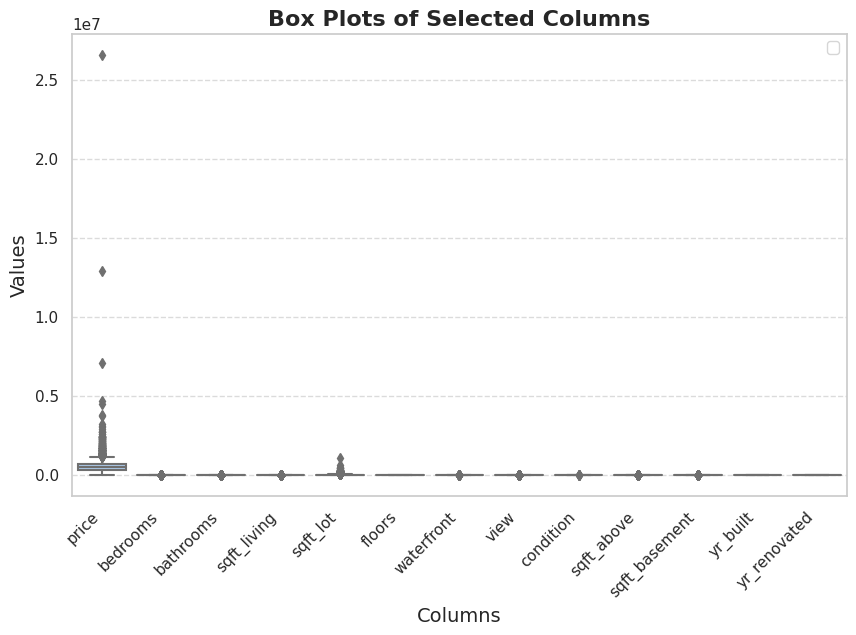

In [12]:
# Set the style
sns.set(style="whitegrid")

# Assuming you have the 'df_no_outliers' DataFrame from the previous code

# Define the color palette for the plot
palette = sns.color_palette("pastel")

# Create a box plot with enhanced styling
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[~outliers], palette=palette, linewidth=1.5)
plt.title('Box Plots of Selected Columns', fontsize=16, fontweight='bold')
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend if needed
plt.legend()

# Show the plot
plt.show()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4549 non-null   float64
 1   bedrooms       4549 non-null   float64
 2   bathrooms      4549 non-null   float64
 3   sqft_living    4549 non-null   int64  
 4   sqft_lot       4549 non-null   int64  
 5   floors         4549 non-null   float64
 6   waterfront     4549 non-null   int64  
 7   view           4549 non-null   int64  
 8   condition      4549 non-null   int64  
 9   sqft_above     4549 non-null   int64  
 10  sqft_basement  4549 non-null   int64  
 11  yr_built       4549 non-null   int64  
 12  yr_renovated   4549 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 497.5 KB


In [14]:
print(df['bedrooms'].unique())
print(df['bathrooms'].unique())
print(df['floors'].unique())

[3. 5. 4. 2. 6. 7. 9. 1. 8.]
[1.5  2.5  2.   2.25 1.   1.75 2.75 3.   3.25 3.5  8.   4.25 4.   3.75
 5.   4.5  5.75 1.25 6.5  4.75 0.75 5.25 5.5  6.25 6.75]
[1.5 2.  1.  2.5 3.  3.5]


In [15]:
df['floors'] = df['floors'].round()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4549 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4549 non-null   float64
 1   bedrooms       4549 non-null   float64
 2   bathrooms      4549 non-null   float64
 3   sqft_living    4549 non-null   int64  
 4   sqft_lot       4549 non-null   int64  
 5   floors         4549 non-null   float64
 6   waterfront     4549 non-null   int64  
 7   view           4549 non-null   int64  
 8   condition      4549 non-null   int64  
 9   sqft_above     4549 non-null   int64  
 10  sqft_basement  4549 non-null   int64  
 11  yr_built       4549 non-null   int64  
 12  yr_renovated   4549 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 497.5 KB


In [17]:
df['bedrooms'].value_counts()

bedrooms
3.0    2025
4.0    1512
2.0     561
5.0     338
6.0      59
1.0      37
7.0      14
8.0       2
9.0       1
Name: count, dtype: int64

In [18]:
fig = px.bar(
    x=df['bedrooms'].value_counts().index,
    y=df['bedrooms'].value_counts().values,
    labels={"x": "Number of Bedrooms", "y": "Number of Houses"},
    title="Number of Bedrooms with Number of Houses",
    color=df['bedrooms'].value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Set3,  # Custom color palette
    template="plotly_white",  # Set the template style
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode='linear', title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top', font=dict(size=16)),
)

# Show the plot
fig.show()

In [19]:
fig = px.bar(
    x=df['bathrooms'].value_counts().index,
    y=df['bathrooms'].value_counts().values,
    labels={"x": "Number of bathrooms", "y": "Number of Houses"},
    title="Number of bathrooms with Number of Houses",
    color=df['bathrooms'].value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Set3,  # Custom color palette
    template="plotly_white",  # Set the template style
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode='linear', title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top', font=dict(size=16)),
)

# Show the plot
fig.show()

In [20]:
px.scatter(
    df,
    y="sqft_living",
    x="price",
    title="Living Square Footage vs Price",
)

In [21]:
px.scatter(
    df,
    y="sqft_lot",
    x="price",
    title="Lot Square Footage vs Price",
)

In [22]:
# Create a bar plot with Plotly Express
fig = px.bar(
    x=df['floors'].value_counts().index,
    y=df['floors'].value_counts().values,
    labels={"x": "Number of Floors", "y": "Number of Houses"},
    title="Number of Floors with Number of Houses",
    color=df['floors'].value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Set2,  # Custom color palette
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode='linear', title_font=dict(size=14)),
    yaxis=dict(title_font=dict(size=14)),
    title=dict(x=0.5, y=0.95, xanchor='center', yanchor='top', font=dict(size=16)),
)

# Show the plot
fig.show()


In [23]:
px.pie(
    df,
    names={'0' : 'No Waterfront', '1' : 'Waterfront'},
    values=df.waterfront.value_counts().values,
    title="Houses with Waterfront",
    color_discrete_sequence=px.colors.qualitative.Set3,
)

In [24]:
px.bar(
    x=df.view.value_counts().index,
    y=df.view.value_counts().values,
    labels={"x": "View", "y": "Number of Houses"},
    title="View with Number of Houses",
    color=df.view.value_counts().index,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

In [25]:
px.bar(
    x=df.condition.value_counts().index,
    y=df.condition.value_counts().values,
    labels={"x": "Condition", "y": "Number of Houses"},
    title="Condition with Number of Houses",
    color=df.condition.value_counts().index,
)

In [26]:
px.scatter(
    df,
    y="sqft_above",
    x="price",
    title="Above Square Footage vs Price",
    color_discrete_sequence=px.colors.qualitative.Set1
)

In [27]:
px.scatter(
    df,
    y="sqft_basement",
    x="price",
    title="Basement Square Footage vs Price",
    color_discrete_sequence=px.colors.qualitative.Set2,
)

In [28]:
px.bar(
    x=df.yr_built.value_counts().index,
    y=df.yr_built.value_counts().values,
    labels={"x": "Year Built", "y": "Number of Houses"},
    title="Year Built with Number of Houses",
    color=df.yr_built.value_counts().index,
)

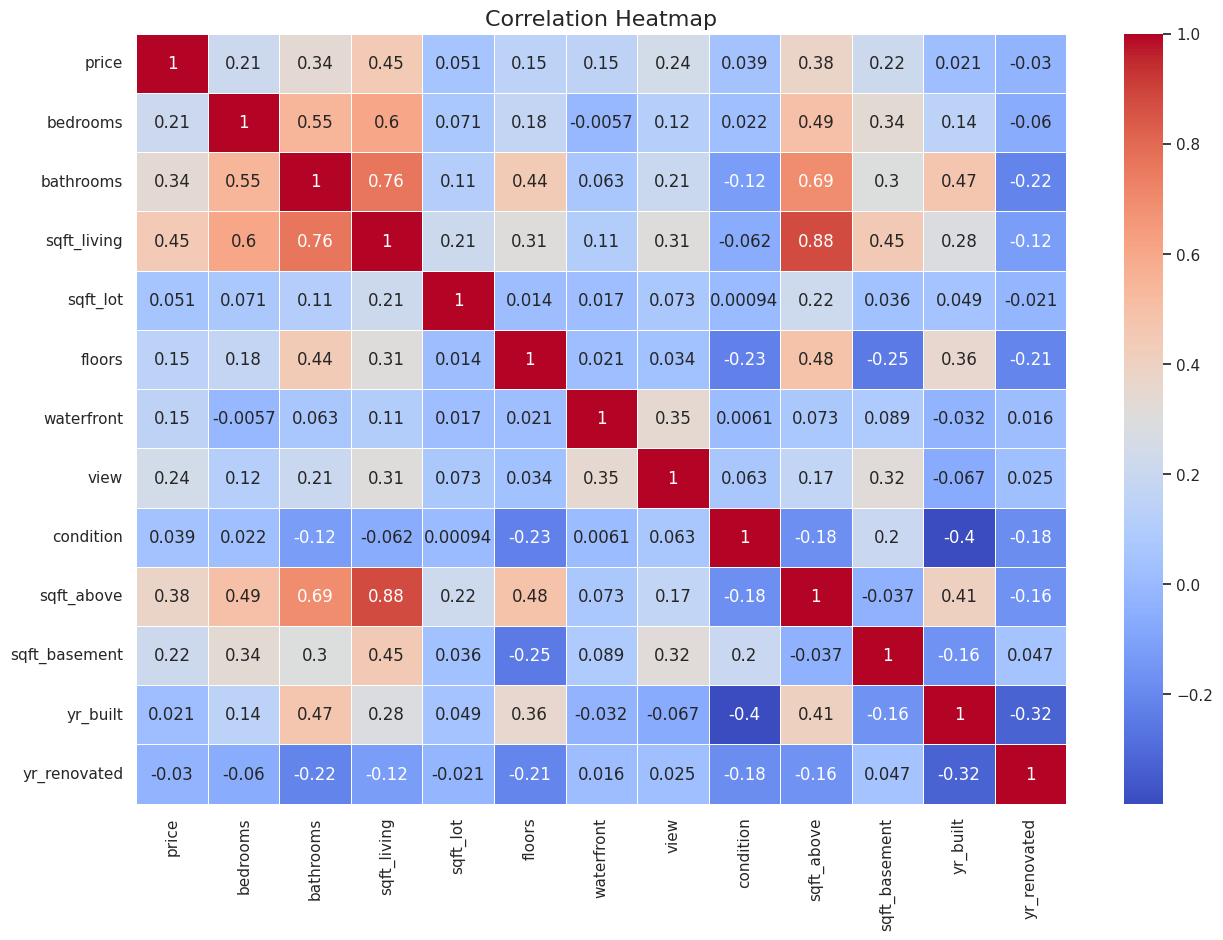

In [29]:
plt.figure(figsize=(15, 10))

# Using a diverging color map (e.g., 'coolwarm')
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', linewidths=.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.show()


In [30]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [33]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
y_pred_linear_train = linear_reg_model.predict(X_train_scaled)
y_pred_linear_test = linear_reg_model.predict(X_test_scaled)

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf_train = random_forest_model.predict(X_train)
y_pred_rf_test = random_forest_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt_train = decision_tree_model.predict(X_train)
y_pred_dt_test = decision_tree_model.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
y_pred_poly_train = poly_reg_model.predict(X_train_poly)
y_pred_poly_test = poly_reg_model.predict(X_test_poly)

# Support Vector Machine (SVM) Regression
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_svm_test = svm_model.predict(X_test_scaled)

# Neural Network
neural_network_model = Sequential()
neural_network_model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
neural_network_model.add(Dense(64, activation='linear'))
neural_network_model.add(Dense(16, activation='linear'))
neural_network_model.add(Dense(8, activation='linear'))
neural_network_model.add(Dense(1, activation='linear'))
neural_network_model.compile(optimizer='adam', loss='mean_squared_error')
neural_network_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)
y_pred_nn_train = neural_network_model.predict(X_train_scaled)
y_pred_nn_test = neural_network_model.predict(X_test_scaled)

# Calculate R2 scores for training and testing sets
r2_train_scores = {
    "Linear Regression": r2_score(y_train, y_pred_linear_train),
    "Random Forest": r2_score(y_train, y_pred_rf_train),
    "Decision Tree": r2_score(y_train, y_pred_dt_train),
    "Polynomial Regression": r2_score(y_train, y_pred_poly_train),
    "SVM": r2_score(y_train, y_pred_svm_train),
    "Neural Network": r2_score(y_train, y_pred_nn_train.flatten())
}

r2_test_scores = {
    "Linear Regression": r2_score(y_test, y_pred_linear_test),
    "Random Forest": r2_score(y_test, y_pred_rf_test),
    "Decision Tree": r2_score(y_test, y_pred_dt_test),
    "Polynomial Regression": r2_score(y_test, y_pred_poly_test),
    "SVM": r2_score(y_test, y_pred_svm_test),
    "Neural Network": r2_score(y_test, y_pred_nn_test.flatten())
}

# Print and sort R2 scores for training set
print("Training R2 Scores:")
sorted_r2_train_scores = sorted(r2_train_scores.items(), key=lambda x: x[1], reverse=True)
for model_name, r2_train_score in sorted_r2_train_scores:
    print(f"{model_name} - Training R2 Score: {r2_train_score}")

# Print and sort R2 scores for testing set
print("\nTesting R2 Scores:")
sorted_r2_test_scores = sorted(r2_test_scores.items(), key=lambda x: x[1], reverse=True)
for model_name, r2_test_score in sorted_r2_test_scores:
    print(f"{model_name} - Testing R2 Score: {r2_test_score}")


Epoch 1/50
114/114 [==============================] - 1s 2ms/step - loss: 668357033984.0000
Epoch 2/50
114/114 [==============================] - 0s 2ms/step - loss: 633760907264.0000
Epoch 3/50
114/114 [==============================] - 0s 2ms/step - loss: 421370068992.0000
Epoch 4/50
114/114 [==============================] - 0s 2ms/step - loss: 324230512640.0000
Epoch 5/50
114/114 [==============================] - 0s 2ms/step - loss: 311380738048.0000
Epoch 6/50
114/114 [==============================] - 0s 2ms/step - loss: 305931190272.0000
Epoch 7/50
114/114 [==============================] - 0s 2ms/step - loss: 301922713600.0000
Epoch 8/50
114/114 [==============================] - 0s 2ms/step - loss: 298708533248.0000
Epoch 9/50
114/114 [==============================] - 0s 2ms/step - loss: 296266366976.0000
Epoch 10/50
114/114 [==============================] - 0s 2ms/step - loss: 294448726016.0000
Epoch 11/50
114/114 [==============================] - 0s 2ms/step - loss: 2926

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Decision Tree Tuning
param_grid_dt = {'max_depth': [5, 10, 15, None]}  # Adjust values as needed
grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_

# Train a decision tree with the best parameters
best_dt_model = DecisionTreeRegressor(**best_params_dt, random_state=42)
best_dt_model.fit(X_train, y_train)

# Random Forest Tuning
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15, None]}  # Adjust values as needed
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train a random forest with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=5, n_estimators=50, random_state=42)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the testing set
y_pred_rf_test_tuned = best_rf_model.predict(X_test)

# Evaluate the performance
mse_rf_test_tuned = mean_squared_error(y_test, y_pred_rf_test_tuned)
r2_rf_test_tuned = r2_score(y_test, y_pred_rf_test_tuned)

print("Random Forest (Tuned) - Testing MSE: {:.2f}".format(mse_rf_test_tuned))
print("Random Forest (Tuned) - Testing R2 Score: {:.2f}".format(r2_rf_test_tuned))


Random Forest (Tuned) - Testing MSE: 85484022091.22
Random Forest (Tuned) - Testing R2 Score: 0.45
